In [1]:
# Load, group, and mean data
import pandas as pd

results = pd.read_csv("ddm_cluster_runs.csv")
results["Dataset"] = [name.split("-")[0] for name in results["Spark App"].values]
results = results.dropna()

color_by_core = {1: "cyan", 2: "tab:blue", 4: "tab:green", 8: "tab:red", 16: "purple"}
marker_by_core = {2: "s", 4: "o", 8: "D"}
marker_by_memory = {"2gb": "D", "4gb": "s", "8gb": "o", "16gb": "H", "32gb": "s"}

results = results[results["Memory"] == "8gb"]
results = results[results["Instances"] < 32]
results = results.groupby(["Dataset", "Instances", "Data Multiplier", "Memory", "Cores"], as_index=False)

results_var = results.var(numeric_only=True)
results_count = results["Cores"].count()
results = results.mean(numeric_only=True)
results["Average Distance Variance"] = results_var["Average Distance"]
results["Num Experiments"] = results_count["Cores"]
results = results[["Dataset", "Instances", "Data Multiplier", "Memory", "Cores", "Num Experiments", "Final Time", "Average Distance", "Average Distance Variance"]]
results = results.sort_values(["Data Multiplier", "Instances", "Cores", "Memory"])

img_counter = 0

results.sort_values("Num Experiments") # .tail(n=50)

,Dataset,Instances,Data Multiplier,Memory,Cores,Num Experiments,Final Time,Average Distance,Average Distance Variance
28,outdoorStream.csv,2,2.0,8gb,2,1,26.054783,90.948052,NaN
27,outdoorStream.csv,2,1.0,8gb,8,2,15.720446,45.549107,153.594109
29,outdoorStream.csv,2,2.0,8gb,8,2,17.034872,95.220865,0.003577
54,outdoorStream.csv,4,1.0,8gb,2,4,12.523222,61.980823,90.941947
104,outdoorStream.csv,8,64.0,8gb,8,5,86.967055,2016.490548,3499.329728
...,...,...,...,...,...,...,...,...,...
131,outdoorStream.csv,16,32.0,8gb,8,7,101.636906,1351.761589,1968.928341
100,outdoorStream.csv,8,32.0,8gb,4,7,89.079954,1359.556068,3668.960989
99,outdoorStream.csv,8,32.0,8gb,2,7,74.865802,1396.076137,3779.617537
130,outdoorStream.csv,16,32.0,8gb,4,7,187.864933,1346.660057,2131.052721


In [2]:
# MPL settings
from matplotlib import pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc("font", size=MEDIUM_SIZE)
plt.rc("axes", titlesize=MEDIUM_SIZE, labelsize=MEDIUM_SIZE)
plt.rc("xtick", labelsize=SMALL_SIZE)
plt.rc("ytick", labelsize=SMALL_SIZE)
plt.rc("legend", fontsize=SMALL_SIZE)
plt.rc("figure", titlesize=BIGGER_SIZE)

In [3]:
# Select dataset
DATASET = "outdoorStream.csv" # "rialto.csv"

results = results[results["Dataset"] == DATASET]

all_mults = results["Data Multiplier"].unique()
all_cores = results["Cores"].unique()
all_mem = results["Memory"].unique()

num_rows = len(pd.read_csv(DATASET))

In [4]:
# Count missing
EXP_TO_RUN = 5

missing = results[results["Num Experiments"] < EXP_TO_RUN]
exp_to_run = ""

for _, exp_missing in missing.iterrows():
    if DATASET == "outdoorStream.csv" and (exp_missing["Data Multiplier"] < 64 or exp_missing["Instances"] > 16):
        continue
    elif DATASET == "rialto.csv" and exp_missing["Data Multiplier"] < 1:
        continue
        
    for i in range(EXP_TO_RUN - exp_missing["Num Experiments"]):
        exp_to_run += "python DDM_Process.py spark://***.***.***.***:7077 %d %s %d $(date | sed 's/ //g' | sed 's/://g') %s\n" % (exp_missing["Instances"], exp_missing["Memory"], exp_missing["Cores"], exp_missing["Data Multiplier"])

with open("missing_exps.sh", "w+") as f:
    f.write(exp_to_run)

[[ 2.          4.          8.         16.        ]
 [15.72044623 13.21444044 14.39733829 19.02254992]]
Multiplier 1.0, rows 4000, num_exp 4
[[ 4.          8.         16.        ]
 [12.52322155 12.49277525 14.71959643]]
Multiplier 1.0, rows 4000, num_exp 4
[[ 4.          8.         16.        ]
 [12.47799921 13.32944245 17.88555608]]
Multiplier 1.0, rows 4000, num_exp 5
0


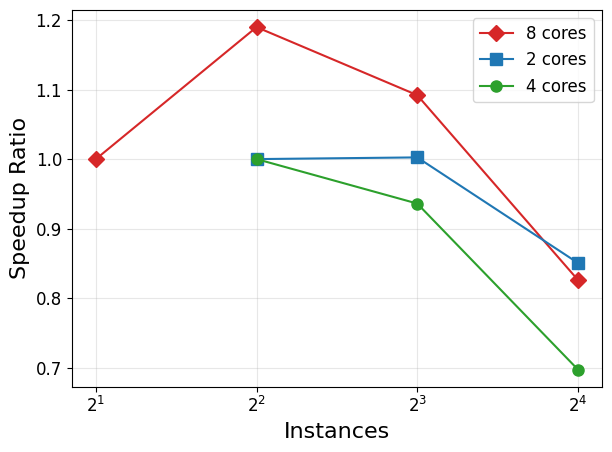

[[ 1.          2.          4.          8.         16.        ]
 [22.47963953 17.03487206 17.89061413 20.53931146 24.19176321]]
Multiplier 2.0, rows 8000, num_exp 4
[[ 1.          2.          4.          8.         16.        ]
 [19.08283257 26.05478287 15.2552454  16.78428531 18.55666862]]
Multiplier 2.0, rows 8000, num_exp 4
[[ 1.          4.          8.         16.        ]
 [22.1376163  15.7469368  18.85184808 22.15343289]]
Multiplier 2.0, rows 8000, num_exp 5
1


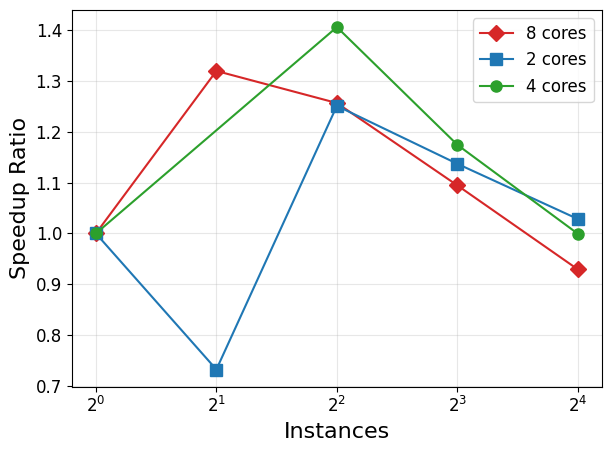

[[ 1.          2.          4.          8.         16.        ]
 [25.62856121 28.18778739 32.33528504 35.01828976 38.65709038]]
Multiplier 4.0, rows 16000, num_exp 5
[[ 1.          2.          4.          8.         16.        ]
 [21.50465326 27.69765124 32.42654343 26.52154474 31.32144089]]
Multiplier 4.0, rows 16000, num_exp 5
[[ 1.          2.          4.          8.         16.        ]
 [25.11881843 34.93499541 36.14952745 25.18035393 32.20195198]]
Multiplier 4.0, rows 16000, num_exp 5
2


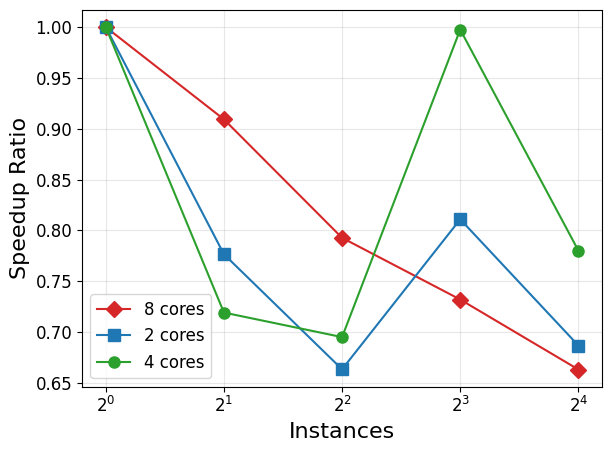

[[ 1.          2.          4.          8.         16.        ]
 [30.78166194 48.08815193 52.14417725 51.70752535 58.3569881 ]]
Multiplier 8.0, rows 32000, num_exp 5
[[ 1.          2.          4.          8.         16.        ]
 [26.24068003 33.59758167 61.14339819 51.6769124  49.98551989]]
Multiplier 8.0, rows 32000, num_exp 5
[[ 1.          2.          4.          8.         16.        ]
 [29.4886023  40.19467082 58.1853076  50.01084852 55.10825901]]
Multiplier 8.0, rows 32000, num_exp 5
3


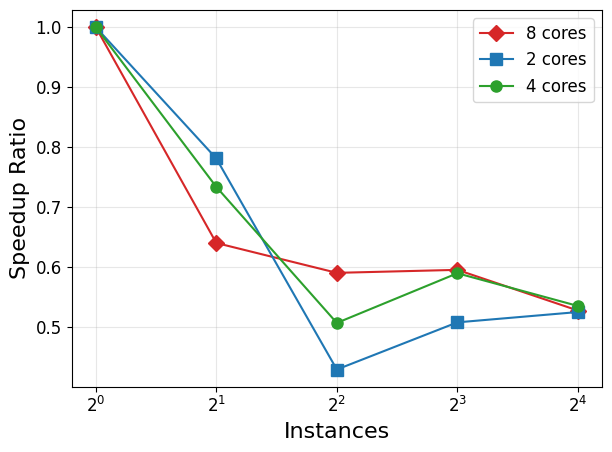

[[  1.           2.           4.           8.          16.        ]
 [ 39.35727639  35.56160483  92.24752111 108.05768495  58.37028251]]
Multiplier 16.0, rows 64000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [ 34.21665916  26.82984238  64.05106211 102.21153598  93.934409  ]]
Multiplier 16.0, rows 64000, num_exp 5
[[ 1.          2.          4.          8.         16.        ]
 [37.24112058 30.41478415 74.83200817 89.85250335 85.48444977]]
Multiplier 16.0, rows 64000, num_exp 5
4


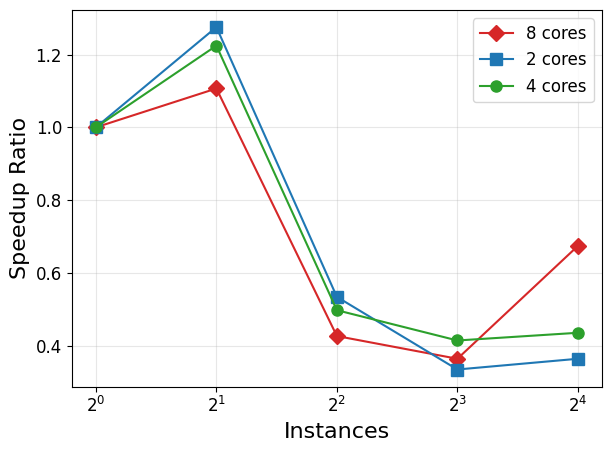

[[  1.           2.           4.           8.          16.        ]
 [ 56.40070167  45.83884993  73.60320568 113.6810704  101.63690594]]
Multiplier 32.0, rows 128000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [ 48.24814687  35.01353588  55.66756887  74.86580191 158.22793204]]
Multiplier 32.0, rows 128000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [ 52.04891791  38.87329898  61.58669219  89.0799536  187.86493288]]
Multiplier 32.0, rows 128000, num_exp 5
5


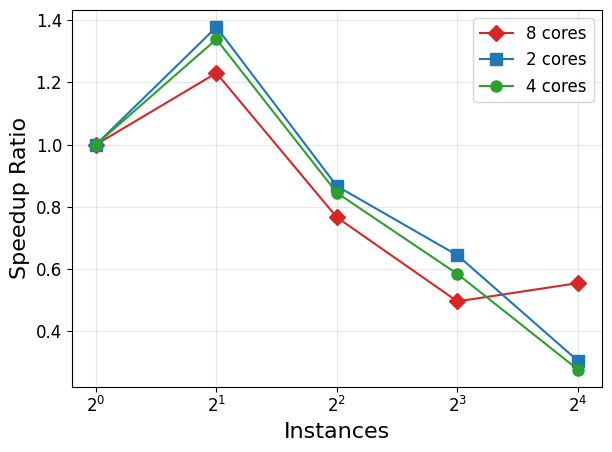

[[  1.           2.           4.           8.          16.        ]
 [ 87.9283442   62.45940413  58.27410932  86.96705508 149.93755083]]
Multiplier 64.0, rows 256000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [ 75.70178366  49.97190895  47.08798571  56.34115357 178.11893191]]
Multiplier 64.0, rows 256000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [ 80.0706676   53.39613395  51.87830753  72.60460544 130.71531315]]
Multiplier 64.0, rows 256000, num_exp 5
6


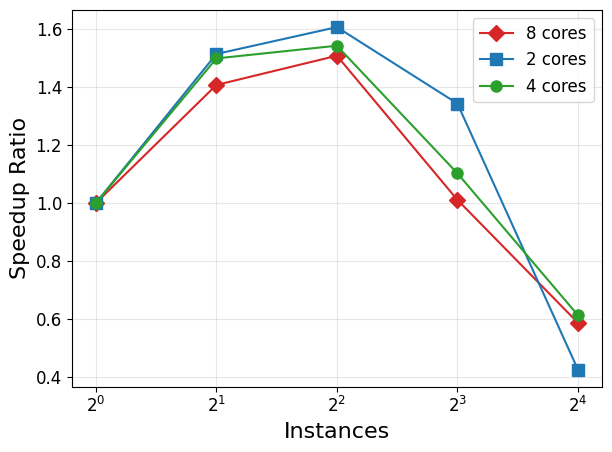

[[  1.           2.           4.           8.          16.        ]
 [147.43018713  93.28976216  86.07529244 117.64264221 195.52427597]]
Multiplier 128.0, rows 512000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [131.79781795  76.32248445  74.05102954  83.96164327 115.34375925]]
Multiplier 128.0, rows 512000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [132.64548588  81.90026827  79.31999106  91.52004142 144.42430878]]
Multiplier 128.0, rows 512000, num_exp 5
7


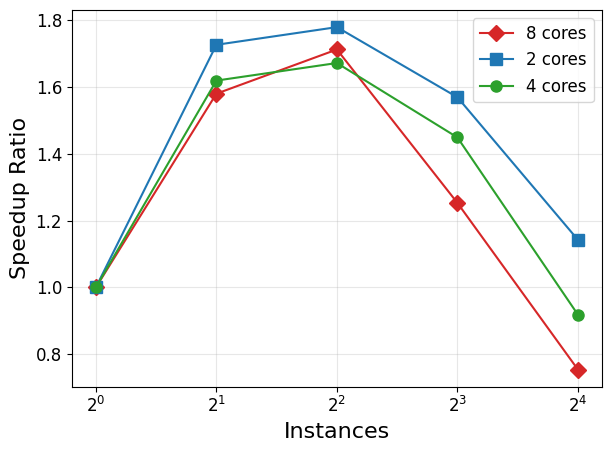

[[  1.           2.           4.           8.          16.        ]
 [268.9342586  155.51762905 138.11241179  94.71185536 158.38476405]]
Multiplier 256.0, rows 1024000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [236.07623196 133.17895293 125.37084794  75.81552668  98.41329327]]
Multiplier 256.0, rows 1024000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [241.71660962 134.20444751 133.7608963   83.58318224 120.25546546]]
Multiplier 256.0, rows 1024000, num_exp 5
8


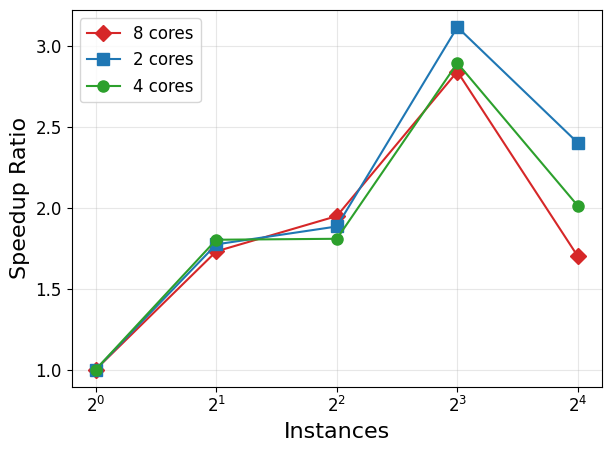

[[  1.           2.           4.           8.          16.        ]
 [519.69606528 278.85396466 238.34944859 145.20693994 108.46686554]]
Multiplier 512.0, rows 2048000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [456.71241565 239.93917289 222.54654121 124.1596982   79.62159753]]
Multiplier 512.0, rows 2048000, num_exp 5
[[  1.           2.           4.           8.          16.        ]
 [458.33501148 243.08167124 236.32670074 134.43948278  90.18744111]]
Multiplier 512.0, rows 2048000, num_exp 5
9


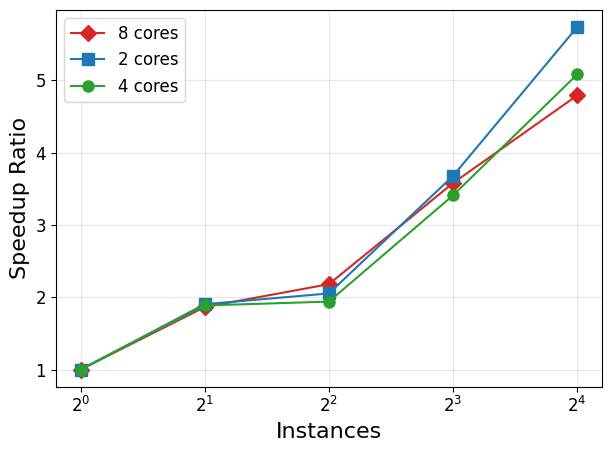

In [5]:
# Speedup
for mult in all_mults:
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for cores in all_cores:
        for mem in all_mem:
            vals = rows_by_mult[rows_by_mult["Cores"] == cores]
            vals = vals[vals["Memory"] == mem][["Instances", "Final Time"]].values.T
            label = "%d cores" % cores
            # label = "%d cores and %s memory" % (cores, mem)
            # print(label, vals, vals.size)
            print(vals)
            print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Cores"] == cores]["Num Experiments"].mean()))
            if vals.size > 0:
                plt.plot(vals[0][:5], vals[1][0]/vals[1][:5], color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)

    plt.ylabel("Speedup Ratio")
    plt.xlabel("Instances")
    plt.xscale("log", base=2)
    # plt.xlim((0, 2**4))

    plt.tight_layout()
    plt.legend()
    plt.grid(alpha=0.3)

    print(img_counter)
    plt.savefig("%d.pdf" % img_counter)
    img_counter += 1
    
    plt.show()

54


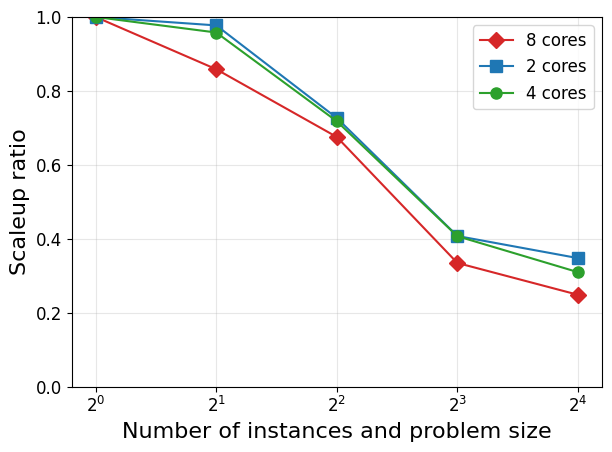

In [17]:
# Scaleup
import numpy as np

for cores in all_cores:
    for mem in all_mem:
        rows_by_mem_and_cores = results[results["Cores"] == cores]
        rows_by_mem_and_cores = rows_by_mem_and_cores[rows_by_mem_and_cores["Memory"] == mem]

        time_by_everything = []
        
        for mult_and_instances in all_mults:
            rows_by_mult = rows_by_mem_and_cores[rows_by_mem_and_cores["Data Multiplier"] == mult_and_instances * 16] # * 2 for outdoorStream
            time_by_everything.append([mult_and_instances, rows_by_mult[rows_by_mult["Instances"] == mult_and_instances]["Final Time"].values])

        label = "%d cores" % cores
        
        if time_by_everything[0][1].size == 0:
            continue
        
        vals = np.array([[v[0], v[1][0]] for v in time_by_everything if v[1].size > 0]).T
        if vals.size > 0:
            # print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Instances"] == mult_and_instances]["Num Experiments"].mean()))
            plt.plot(vals[0], vals[1][0]/vals[1], color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)
    
plt.ylabel("Scaleup ratio")
plt.ylim(0, 1)
plt.xlabel("Number of instances and problem size")
plt.xscale("log", base=2)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

print(img_counter)
plt.savefig("%d.pdf" % img_counter)
img_counter += 1

plt.show()

Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 5
11


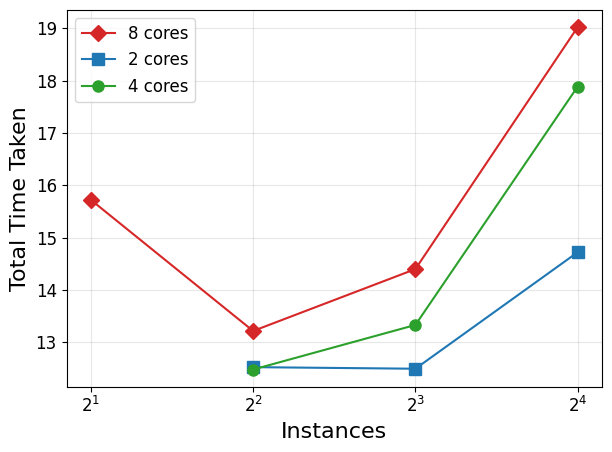

Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 5
12


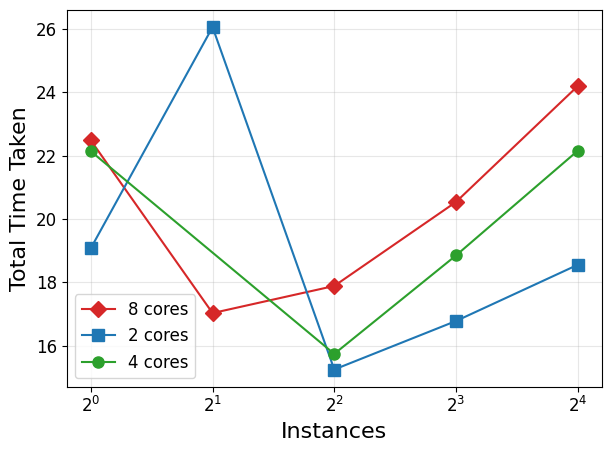

Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
13


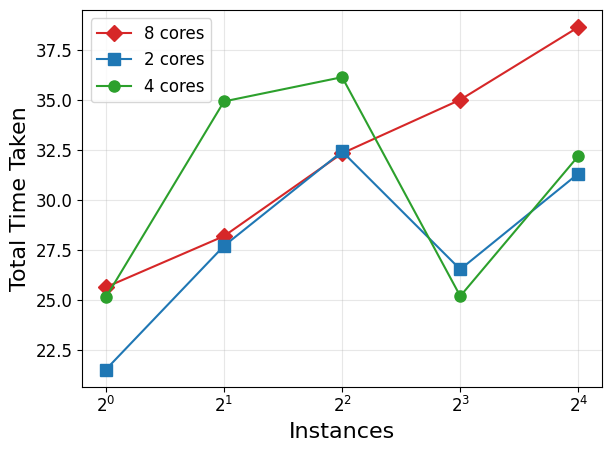

Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
14


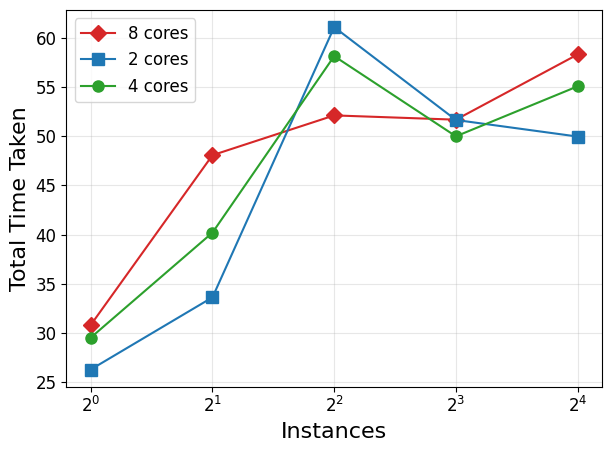

Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
15


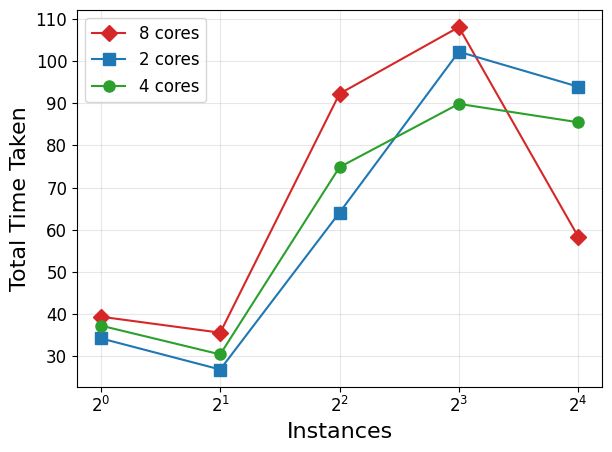

Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
16


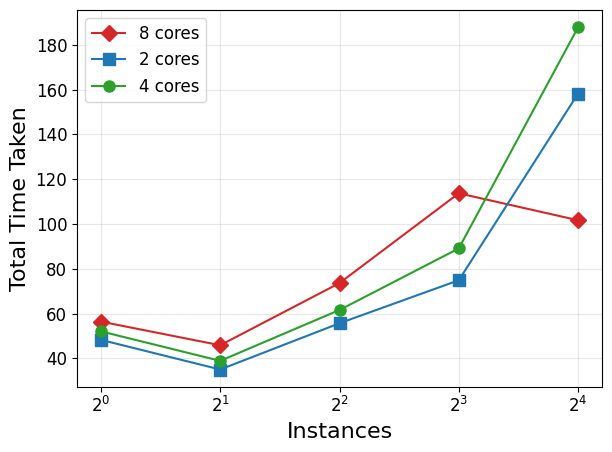

Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
17


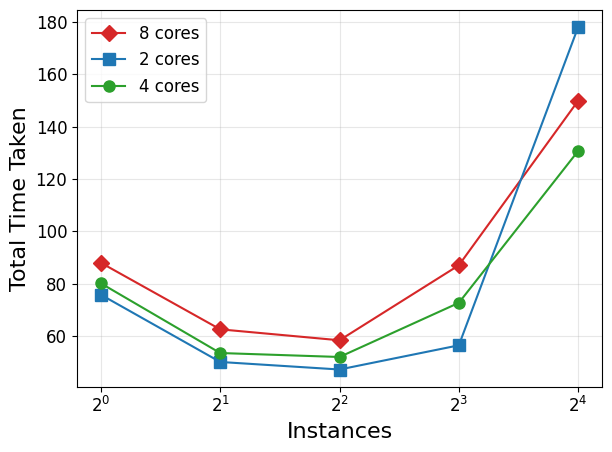

Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
18


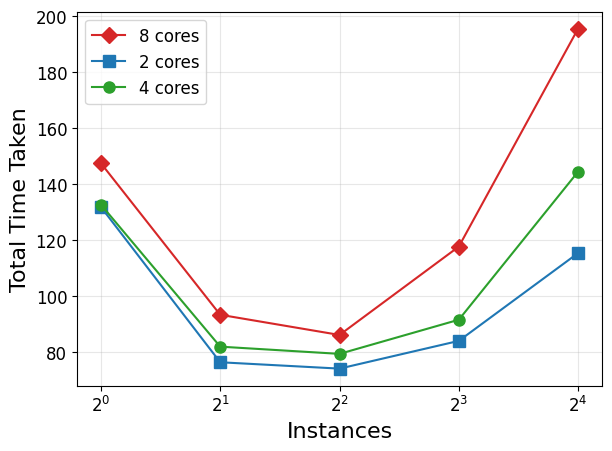

Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
19


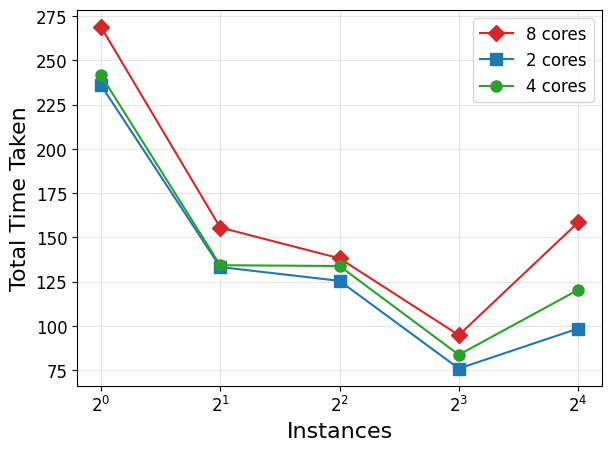

Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
20


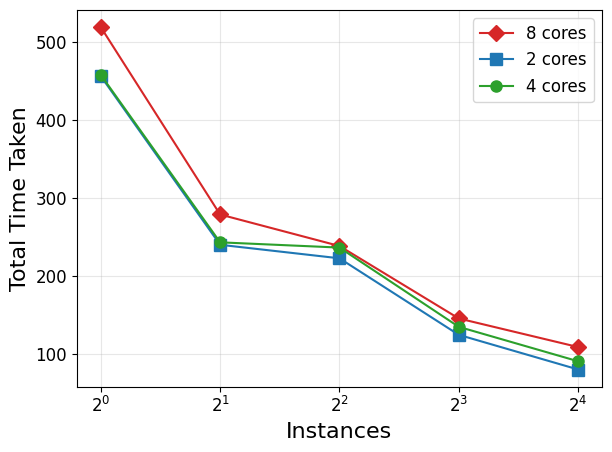

In [7]:
# Time taken
for mult in all_mults:
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for cores in all_cores:
        for mem in all_mem:
            vals = rows_by_mult[rows_by_mult["Cores"] == cores]
            vals = vals[vals["Memory"] == mem][["Instances", "Final Time"]].values.T
            label = "%d cores" % cores
            # print(label, vals, vals.size)
            if vals.size > 0:
                print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Cores"] == cores]["Num Experiments"].mean()))
                plt.plot(vals[0], vals[1], color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)

    plt.ylabel("Total Time Taken")
    plt.xlabel("Instances")
    plt.xscale("log", base=2)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    print(img_counter)
    plt.savefig("%d.pdf" % img_counter)
    img_counter += 1

    plt.show()

In [8]:
# Save time taken table
table = []
instances = sorted(results["Instances"].unique().tolist(), key=lambda x: int(x))
for mult in sorted(results["Data Multiplier"].unique().tolist(), key=lambda x: float(x)):
    row = [mult]
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for inst in instances:
        rows_by_inst = rows_by_mult[rows_by_mult["Instances"] == inst]
        for core in sorted(results["Cores"].unique().tolist(), key=lambda x: int(x)):
            row.append(rows_by_inst[rows_by_inst["Cores"] == core].mean(numeric_only=True)["Final Time"])
    table.append(row)

columns = []
for inst in sorted(results["Instances"].unique().tolist(), key=lambda x: int(x)):
    for core in sorted(results["Cores"].unique().tolist(), key=lambda x: int(x)):
        columns.append("%d instances, %d cores" % (inst, core))

pd.DataFrame(table, columns=["Multiplier"] + columns).to_csv("time_table.csv", index=False)

Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 5
21


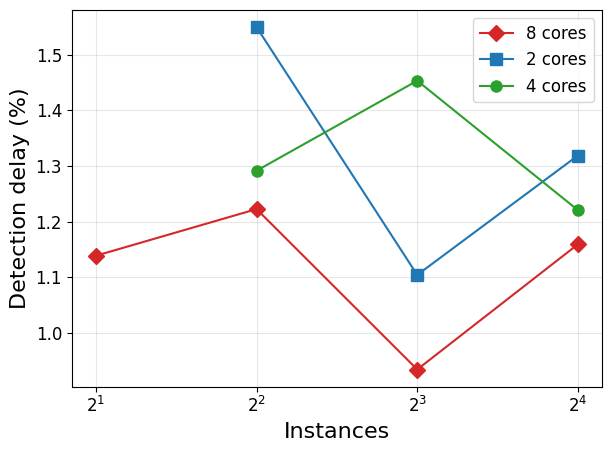

Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 5
22


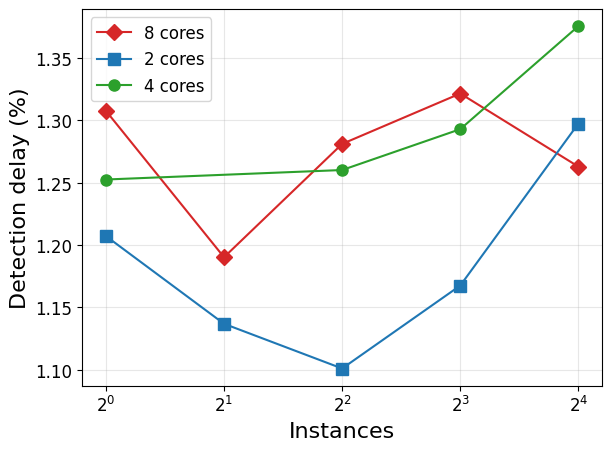

Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
23


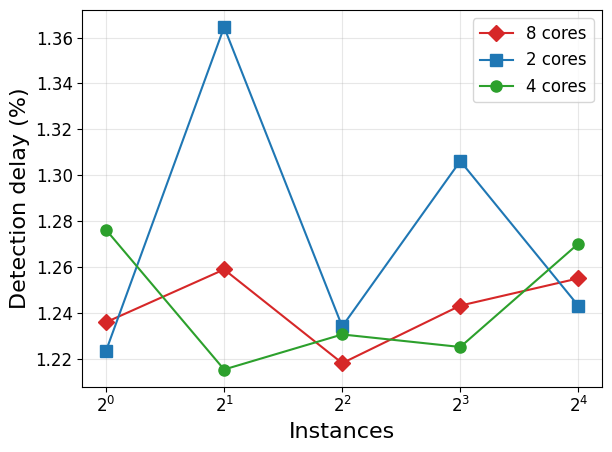

Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
24


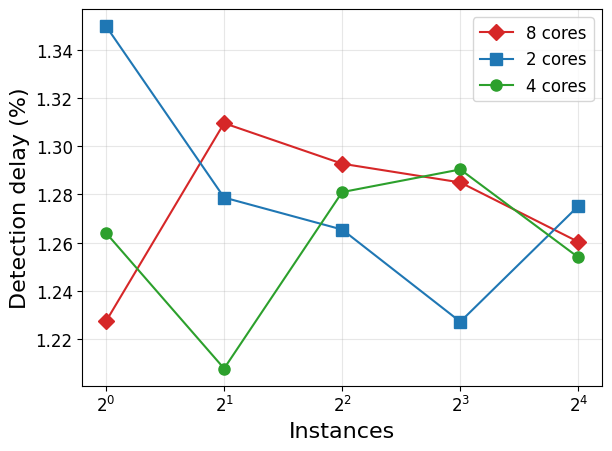

Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
25


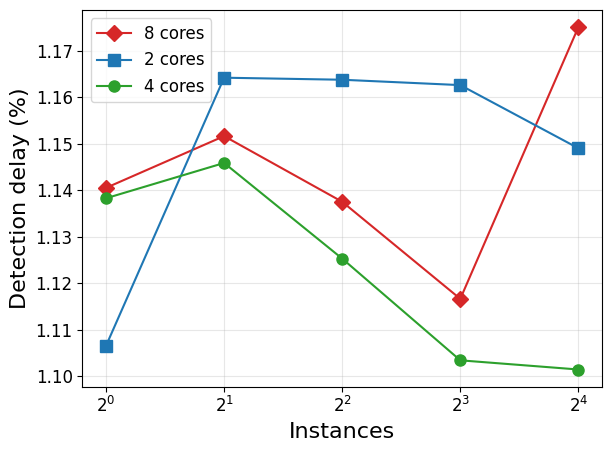

Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
26


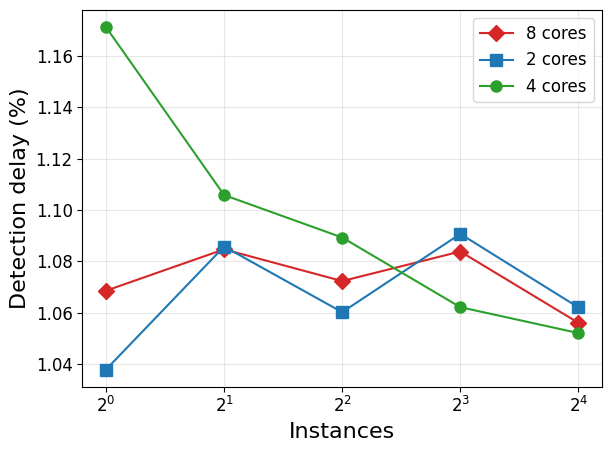

Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
27


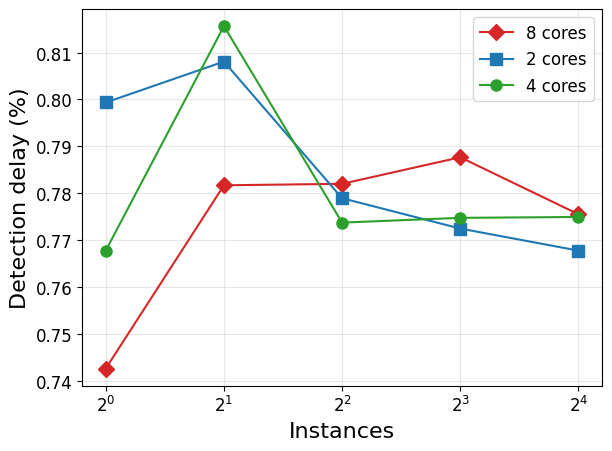

Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
28


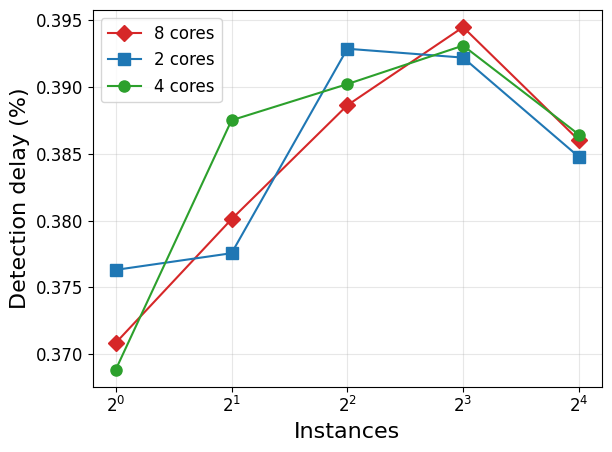

Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
29


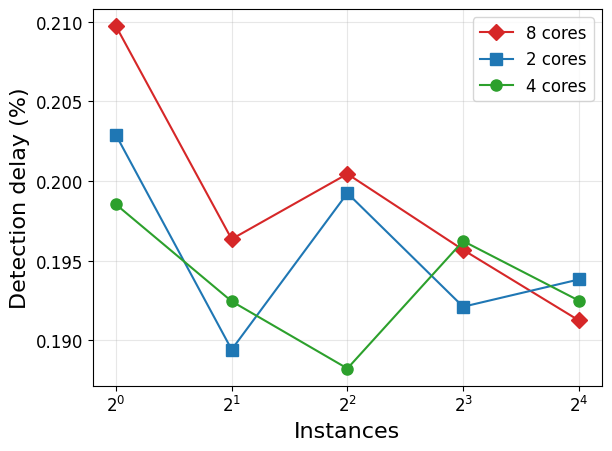

Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
30


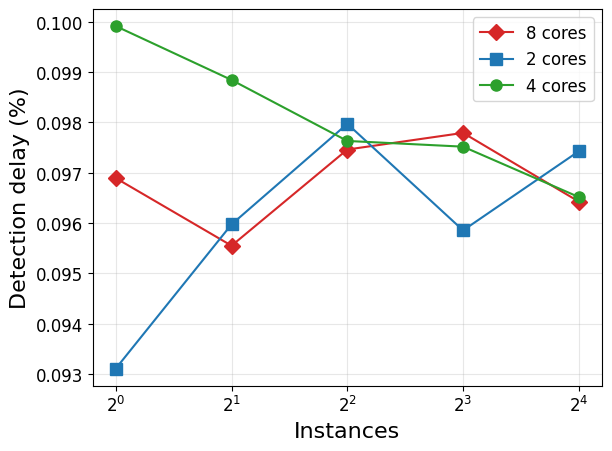

Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 5
31


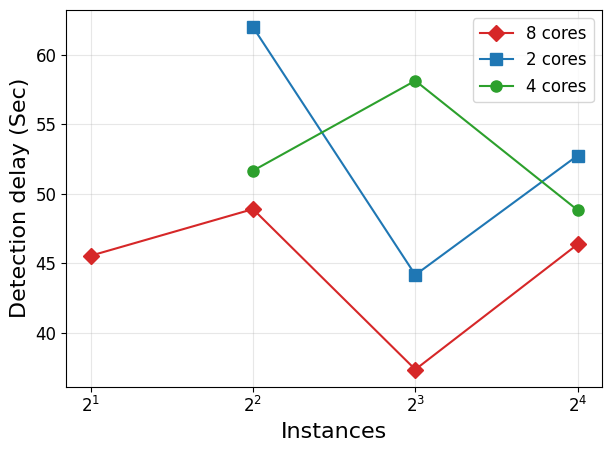

Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 5
32


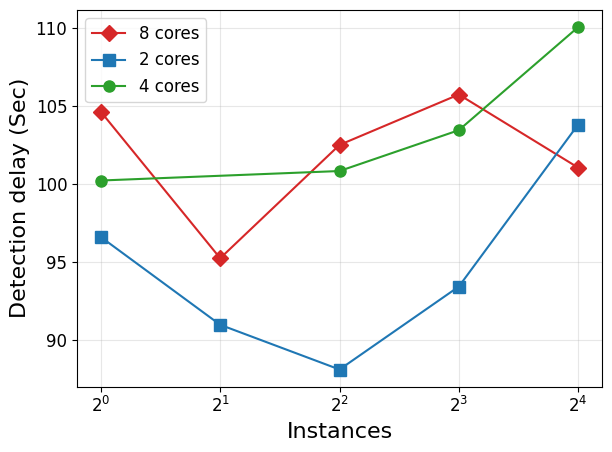

Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
33


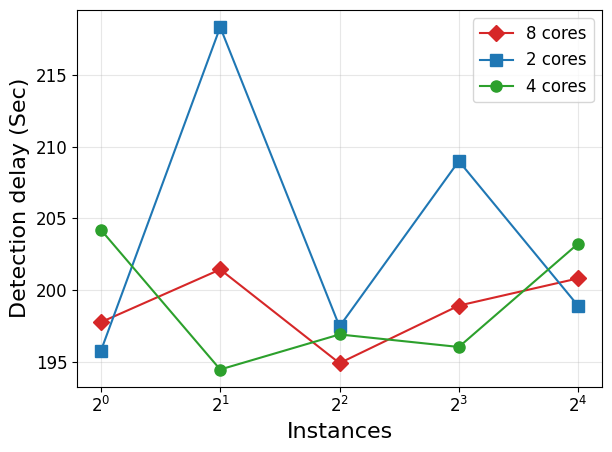

Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
34


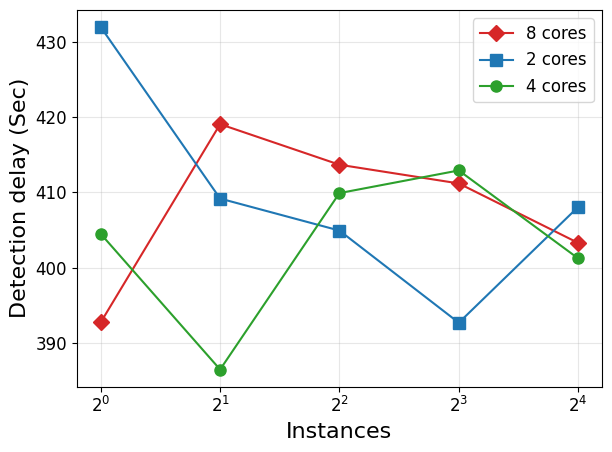

Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
35


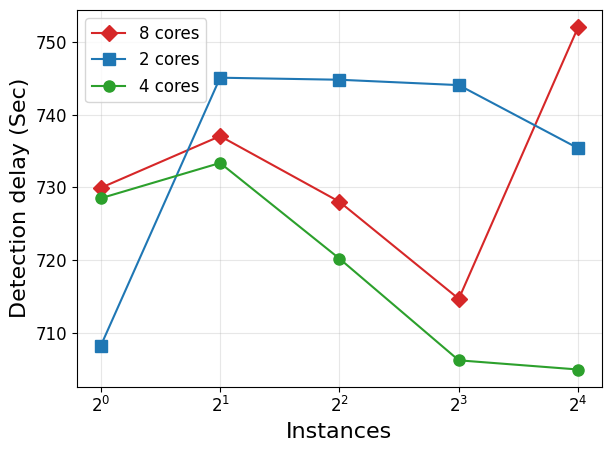

Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
36


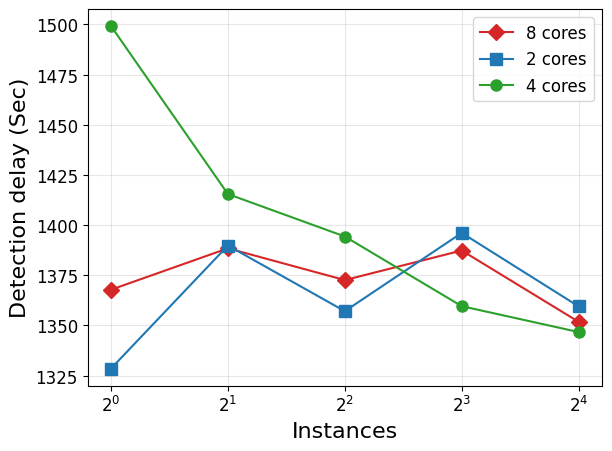

Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
37


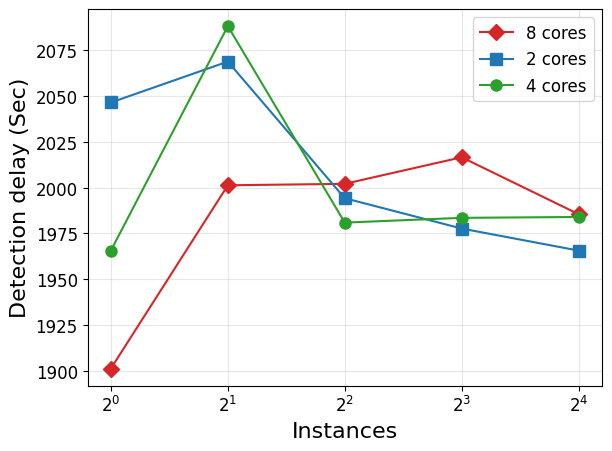

Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
38


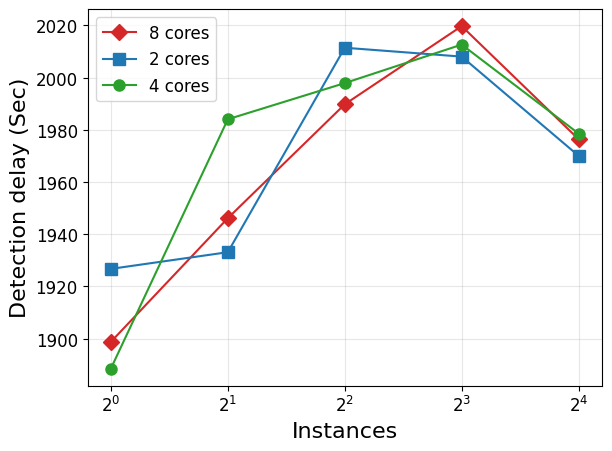

Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
39


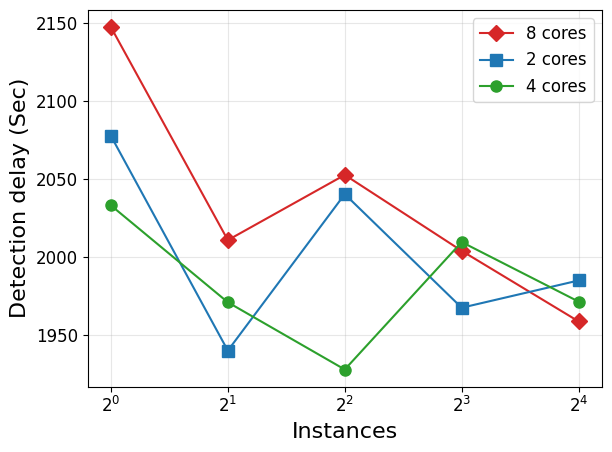

Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
40


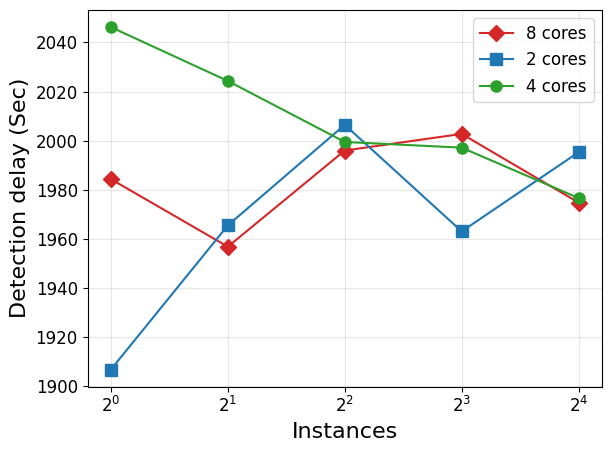

In [9]:
# Delay of detection
for mult in all_mults:
    rows = (mult * num_rows)
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for cores in all_cores:
        for mem in all_mem:
            vals = rows_by_mult[rows_by_mult["Cores"] == cores]
            vals = vals[vals["Memory"] == mem][["Instances", "Average Distance"]].values.T
            label = "%d cores" % cores
            # print(label, vals, vals.size)
            if vals.size > 0:
                print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Cores"] == cores]["Num Experiments"].mean()))
                plt.plot(vals[0], 100*(vals[1]/rows), color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)

    plt.ylabel("Detection delay (%)")
    plt.xlabel("Instances")
    plt.xscale("log", base=2)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    print(img_counter)
    plt.savefig("%d.pdf" % img_counter)
    img_counter += 1

    plt.show()

for mult in all_mults:
    rows = (mult * num_rows)
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for cores in all_cores:
        for mem in all_mem:
            vals = rows_by_mult[rows_by_mult["Cores"] == cores]
            vals = vals[vals["Memory"] == mem][["Instances", "Average Distance"]].values.T
            label = "%d cores" % cores
            # print(label, vals, vals.size)
            if vals.size > 0:
                print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Cores"] == cores]["Num Experiments"].mean()))
                plt.plot(vals[0], vals[1], color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)

    plt.ylabel("Detection delay (Sec)")
    plt.xlabel("Instances")
    plt.xscale("log", base=2)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    print(img_counter)
    plt.savefig("%d.pdf" % img_counter)
    img_counter += 1

    plt.show()

Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 4
Multiplier 1.0, rows 4000, num_exp 5
41


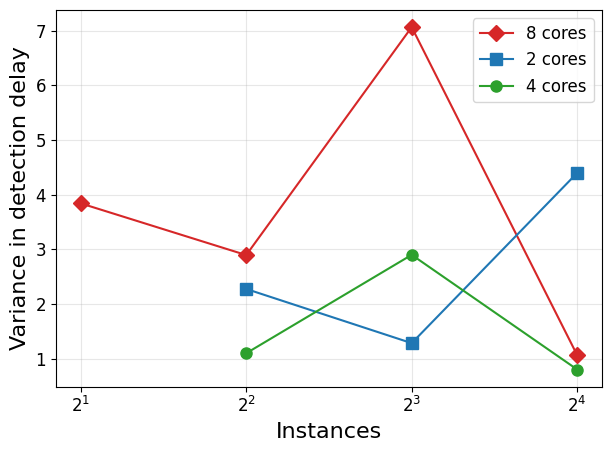

Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 4
Multiplier 2.0, rows 8000, num_exp 5
42


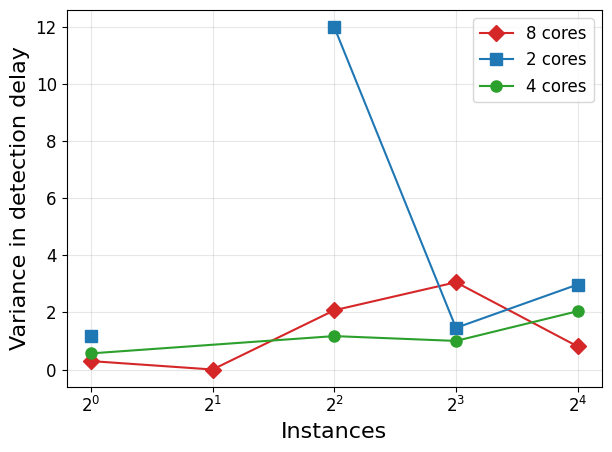

Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
Multiplier 4.0, rows 16000, num_exp 5
43


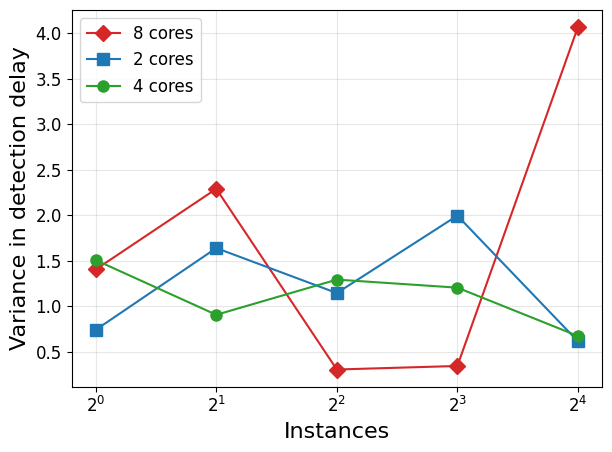

Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
Multiplier 8.0, rows 32000, num_exp 5
44


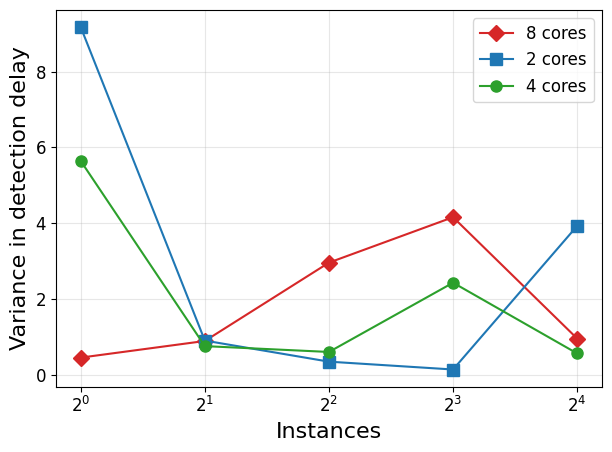

Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
Multiplier 16.0, rows 64000, num_exp 5
45


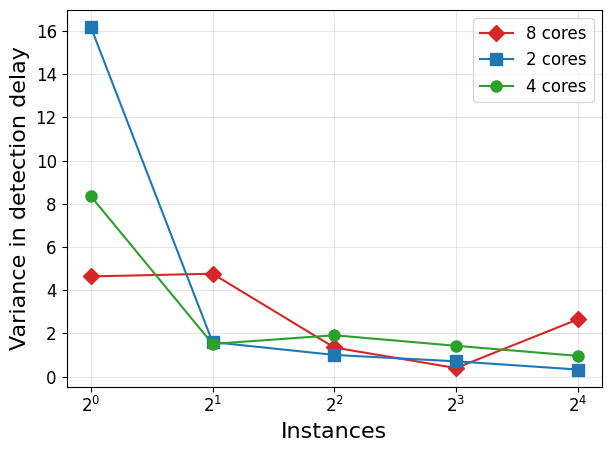

Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
Multiplier 32.0, rows 128000, num_exp 5
46


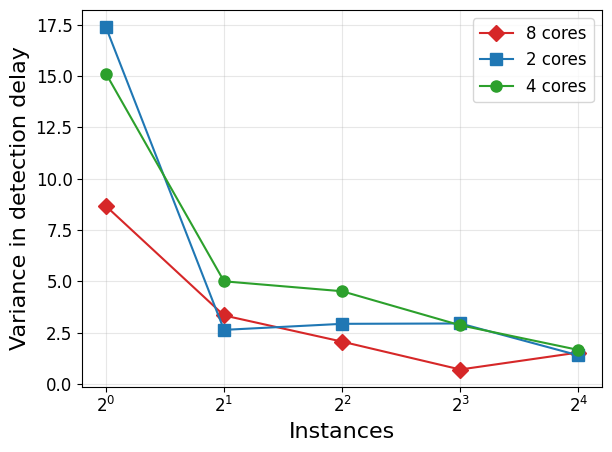

Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
Multiplier 64.0, rows 256000, num_exp 5
47


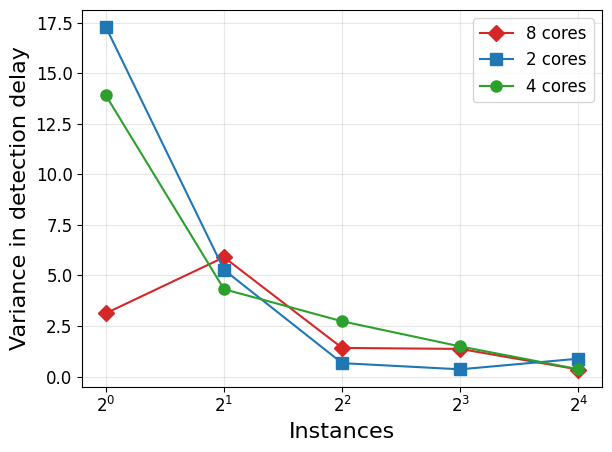

Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
Multiplier 128.0, rows 512000, num_exp 5
48


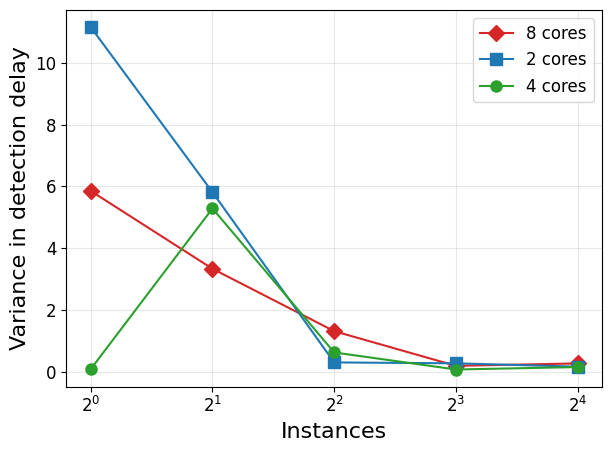

Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
Multiplier 256.0, rows 1024000, num_exp 5
49


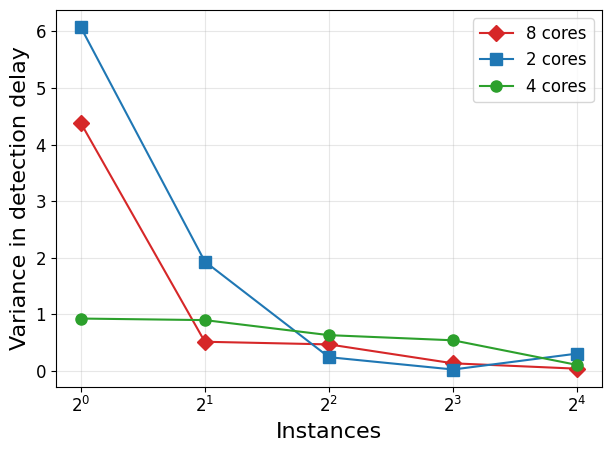

Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
Multiplier 512.0, rows 2048000, num_exp 5
50


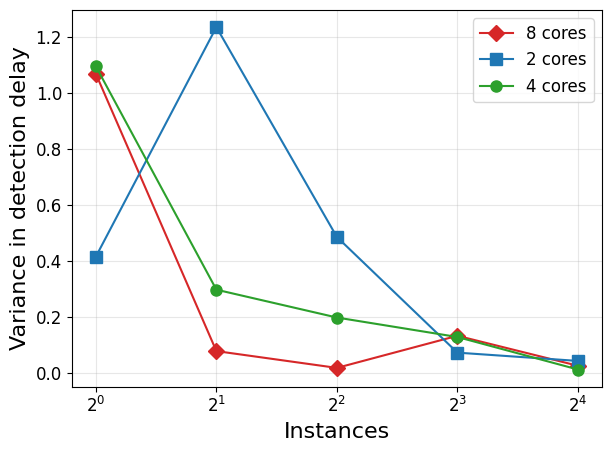

In [10]:
# Delay of detection variance
for mult in all_mults:
    rows = (mult * num_rows)
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for cores in all_cores:
        for mem in all_mem:
            vals = rows_by_mult[rows_by_mult["Cores"] == cores]
            vals = vals[vals["Memory"] == mem][["Instances", "Average Distance Variance"]].values.T
            label = "%d cores" % cores
            # print(label, vals, vals.size)
            if vals.size > 0:
                print("Multiplier %.1f, rows %d, num_exp %d" % (mult, mult * num_rows, rows_by_mult[rows_by_mult["Cores"] == cores]["Num Experiments"].mean()))
                plt.plot(vals[0], 100*(vals[1]/rows), color=color_by_core[cores], marker=marker_by_core[cores], label=label, markersize=8)

    plt.ylabel("Variance in detection delay")
    plt.xlabel("Instances")
    plt.xscale("log", base=2)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    print(img_counter)
    plt.savefig("%d.pdf" % img_counter)
    img_counter += 1

    plt.show()

In [11]:
# Save drift table
table = []
instances = results["Instances"].unique().tolist()
for mult in all_mults:
    row = [mult]
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for inst in instances:
        row.append(rows_by_mult[rows_by_mult["Instances"] == inst].mean(numeric_only=True)["Average Distance"])
    table.append(row)

pd.DataFrame(table, columns=["Multiplier"] + instances).to_csv("drift_delay.csv", index=False)

In [12]:
# Save drift var table
table = []
instances = sorted(results["Instances"].unique().tolist(), key=lambda x: int(x))
for mult in all_mults:
    row = [mult]
    rows_by_mult = results[results["Data Multiplier"] == mult]
    for inst in instances:
        row.append(rows_by_mult[rows_by_mult["Instances"] == inst].mean(numeric_only=True)["Average Distance Variance"])
    table.append(row)

pd.DataFrame(table, columns=["Multiplier"] + instances).to_csv("drift_delay_var.csv", index=False)